### Goal of this workflow is to show an example of how to categorize data in a pandas DataFrame and then to scale many features to two for easy visualization and computiation

Import different packages I'll need and the data

In [2]:
import numpy as np                                          # arrays and matrix math
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
import geostatspy.GSLIB as GSLIB                            # for visualizing grid
import seaborn as sns

from sklearn.manifold import MDS

from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
data = pd.read_csv('unconv_MV_v5.csv')

Look at the data and statistics to see what we're working with

In [4]:
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,4311.219852,992.038414,2107.139414,3618.064513,4284.687348,5086.089761,6662.622385


Solving for the 25th and 75th percentile, then visualizing the data to make sure these values seem to make sense

25th percentile: 3618.0645135 75th percentile: 5086.089761


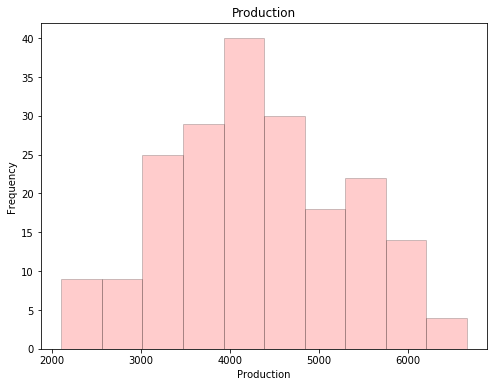

In [7]:
prod25,prod75 = np.percentile(data['Prod'], [25, 75])
print('25th percentile:',str(prod25),'75th percentile:',str(prod75))
GSLIB.hist(data['Prod'], np.min(data['Prod']), np.max(data['Prod']), False, False, 10,None, 'Production','Production','Production')

Categorizing production data as high (>75th percentile), low (<25th percentile), or medium (between 25th and 75th percentile)

In [8]:
data['ProdCat'] = np.where(data['Prod'] < prod25, 'low',
                           np.where(data['Prod'] > prod75, 'high', 'medium'))


In [9]:
data.head(15)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,ProdCat
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,medium
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,low
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,medium
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,high
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,low
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259,medium
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989,medium
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701,low
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153,medium
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122,medium


Visualizing the relationship between different variables, with color emphasis on high, low, and medium production

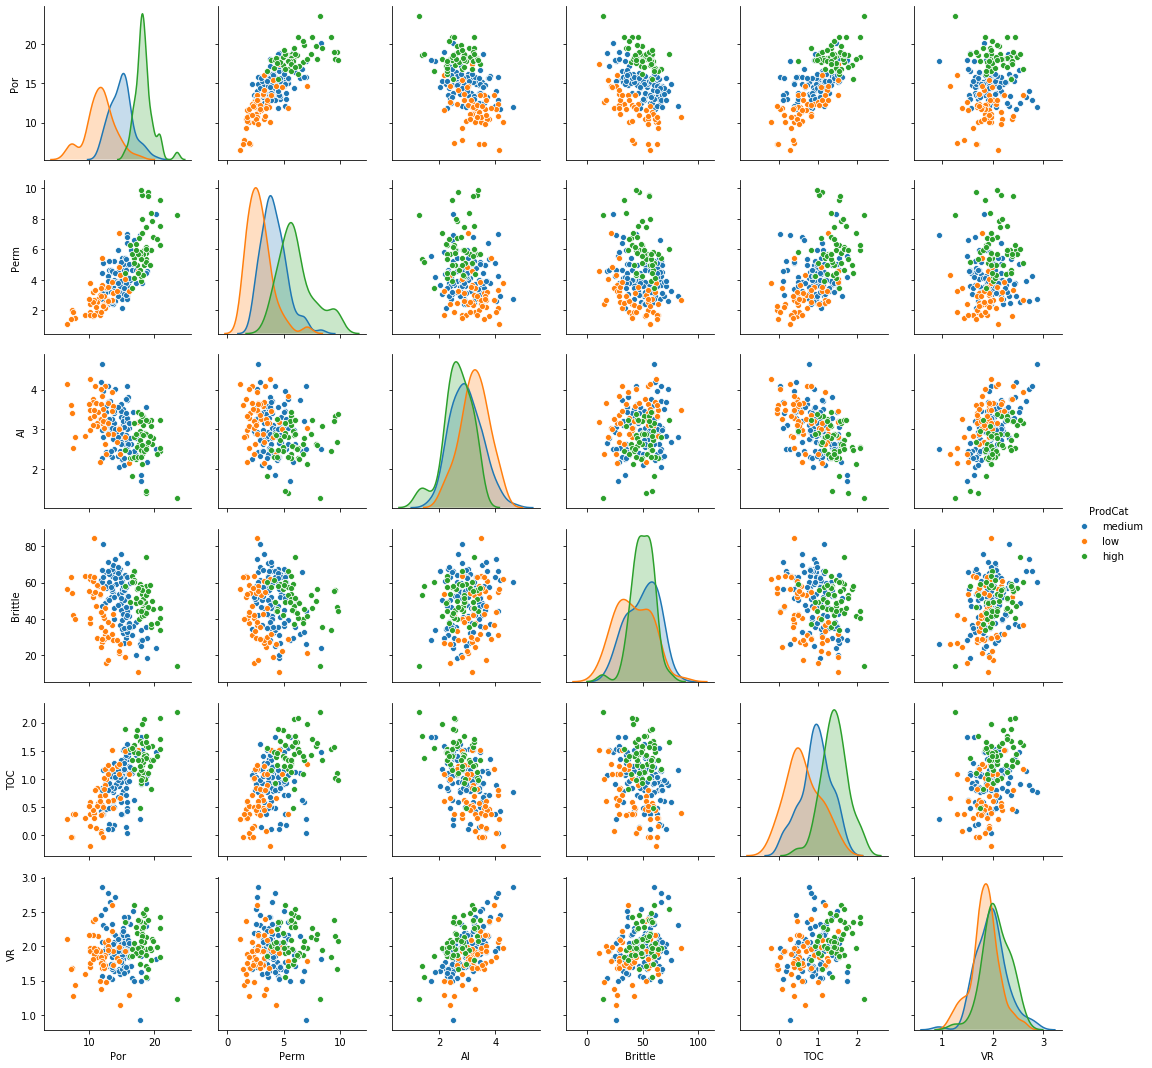

In [12]:
sns.pairplot(data,hue='ProdCat', vars=['Por','Perm','AI','Brittle','TOC','VR'])

Initalizing the multidimensional scaling transform -- transforming 6 variables to 2 for easier visualization and lower computational time

In [10]:
mds = MDS(2)
data_trans = mds.fit_transform(data[['Por','Perm','AI','Brittle','TOC','VR']])
data_trans.shape

(200, 2)

In [11]:
data['MDS1'] = data_trans[:,0]
data['MDS2'] = data_trans[:,1]
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,ProdCat,MDS1,MDS2
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,medium,7.652059,-32.528512
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,low,2.601088,2.260451
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,medium,4.916738,-24.312150
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,high,-4.332091,8.011793
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,low,-3.996971,37.127544


Visualizing the two scaled features in the scaled-feature-space with respect to production category

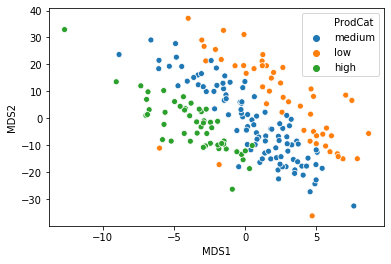

In [12]:
sns.scatterplot(data['MDS1'],data['MDS2'],hue = data['ProdCat'],markers='o')